In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
train_df = pd.read_csv('../input/digit-recognizer/train.csv')
train_df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test_df = pd.read_csv('../input/digit-recognizer/test.csv')
test_df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X = train_df.iloc[:,1:].values
y = train_df.label

In [5]:
print(X.shape)
print(y.shape)

(42000, 784)
(42000,)


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
from random import randint

In [7]:
X[324]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,  51, 133, 243, 196, 134, 133,  59,  13,  10,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0, 128, 238, 253, 253, 254, 253, 253, 253,
       227, 145,  39,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,  37, 206, 217, 218, 220,
       253, 253, 253, 253, 221,  98,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

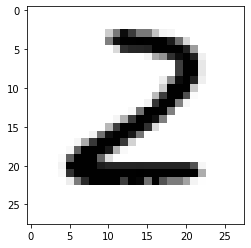

In [8]:
plt.imshow(X[324].reshape(28, 28), cmap='gray_r')

In [9]:
X = X.astype('float32')
y = y.values.reshape(y.shape[0], 1).astype('int32')

X /= 255

In [10]:
y

array([[1],
       [0],
       [1],
       ...,
       [7],
       [6],
       [9]], dtype=int32)

In [11]:
import tensorflow as tf

y = tf.keras.utils.to_categorical(y, 10)

In [12]:
print(y[2])

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [13]:
ann = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=512, input_shape=[784], activation='relu'),
    tf.keras.layers.Dense(units=512, activation='sigmoid'),
    tf.keras.layers.Dense(units=10, activation='softmax'),
])

In [14]:
ann.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [15]:
ann.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
history = ann.fit(X, y, epochs=8, validation_split=0.4, batch_size=50)

Epoch 1/8
504/504 [==============================] - 2s 3ms/step - loss: 0.3292 - accuracy: 0.9019 - val_loss: 0.1647 - val_accuracy: 0.9498
Epoch 2/8
504/504 [==============================] - 2s 3ms/step - loss: 0.1238 - accuracy: 0.9627 - val_loss: 0.1304 - val_accuracy: 0.9597
Epoch 3/8
504/504 [==============================] - 1s 3ms/step - loss: 0.0766 - accuracy: 0.9769 - val_loss: 0.1080 - val_accuracy: 0.9666
Epoch 4/8
504/504 [==============================] - 1s 3ms/step - loss: 0.0503 - accuracy: 0.9845 - val_loss: 0.1057 - val_accuracy: 0.9665
Epoch 5/8
504/504 [==============================] - 1s 3ms/step - loss: 0.0359 - accuracy: 0.9885 - val_loss: 0.0983 - val_accuracy: 0.9712
Epoch 6/8
504/504 [==============================] - 1s 3ms/step - loss: 0.0251 - accuracy: 0.9912 - val_loss: 0.1027 - val_accuracy: 0.9712
Epoch 7/8
504/504 [==============================] - 1s 3ms/step - loss: 0.0233 - accuracy: 0.9925 - val_loss: 0.1096 - val_accuracy: 0.9695
Epoch 8/8
504

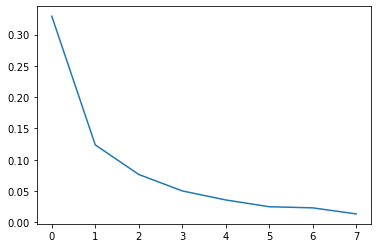

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['loss'])
plt.show()

In [18]:
# test_input = test_df.values.astype('float32')
# test_input /= 255
# results = ann.predict_classes(test_input)

In [19]:
# submissions=pd.DataFrame({"ImageId": list(range(1,len(results)+1)),
#                          "Label": results})
# submissions.to_csv("submission.csv", index=False, header=True)

# using cnn

In [20]:
X = X.reshape(X.shape[0], 28, 28, 1)

In [21]:
import kerastuner as kt
# hp = kt.engine.hyperparameters.HyperParameters()


In [22]:
def build_model(hp):

    hidden_layer_1_filter_params = hp.Int(
        'filters_1', min_value=32, max_value=256, step=32)
    hidden_layer_1_kernelsize_params = hp.Int(
        'kernelsize_1', min_value=3, max_value=5, step=1)
    hidden_layer_1_dropoutrate_params = hp.Float(
        'dropoutrate_1', min_value=0.2, max_value=0.5, step=0.05)

    hidden_layer_2_filter_params = hp.Int(
        'filters_2', min_value=32, max_value=256, step=32)
    hidden_layer_2_kernelsize_params = hp.Int(
        'kernelsize_2', min_value=3, max_value=5, step=1)
    hidden_layer_2_dropoutrate_params = hp.Float(
        'dropoutrate_2', min_value=0.2, max_value=0.5, step=0.05)

    hidden_layer_3_units_params = hp.Int(
        'units_3', min_value=32, max_value=256, step=32)
    hidden_layer_3_dropoutrate_params = hp.Float(
        'dropoutrate_3', min_value=0.2, max_value=0.5, step=0.05)

    learning_rate_params = hp.Choice(
        'learning_rate', values=[1e-2, 1e-3, 1e-4])

    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(filters=hidden_layer_1_filter_params,
                               kernel_size=hidden_layer_1_kernelsize_params, activation='relu', input_shape=[28, 28, 1]),
        tf.keras.layers.MaxPooling2D(pool_size=2),
        tf.keras.layers.Dropout(hidden_layer_1_dropoutrate_params),

        tf.keras.layers.Conv2D(filters=hidden_layer_2_filter_params,
                               kernel_size=hidden_layer_2_kernelsize_params, activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=2),
        tf.keras.layers.Dropout(hidden_layer_2_dropoutrate_params),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(
            units=hidden_layer_3_units_params, activation='relu'),
        tf.keras.layers.Dropout(hidden_layer_3_dropoutrate_params),
        tf.keras.layers.Dense(units=10, activation='softmax'),
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate_params),loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [23]:
# cnn = tf.keras.models.Sequential([
#     tf.keras.layers.Conv2D(filters=6, kernel_size=5, activation='relu', input_shape=[28, 28, 1]),
#     tf.keras.layers.MaxPooling2D(pool_size=2),
#     tf.keras.layers.Dropout(0.25),
    
#     tf.keras.layers.Conv2D(filters=16, kernel_size=5, activation='relu'),
#     tf.keras.layers.MaxPooling2D(pool_size=2),
#     tf.keras.layers.Dropout(0.25), 
    
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(units=128, activation='relu'),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(units=10, activation='softmax'),
# ])
# cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#cnn.summary()

In [25]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    min_delta=0.001, 
    patience=5, 
    restore_best_weights=True,
)

tuner_bo = kt.tuners.BayesianOptimization(
                build_model,objective=kt.Objective('val_accuracy', direction="max"), max_trials =20, executions_per_trial=3
)

tuner_bo.search(X, y, epochs=3, batch_size=32 ,validation_split=0.4)
best_model = tuner_bo.get_best_models(num_models=1)[0]
print(best_model.summary())

Trial 20 Complete [00h 00m 50s]
val_accuracy: 0.9884325464566549

Best val_accuracy So Far: 0.9884325464566549
Total elapsed time: 00h 14m 06s
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 192)       3264      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 192)       0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 192)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 9, 9, 224)         688352    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 224)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 224

In [27]:
best_hp = tuner_bo.get_best_hyperparameters()[0]
best_hp.values
# for hp in ['backbone', 'dropout_1', 'dropout_2', 'lr', 'units']:
#     print(f'{hp} = {best_hp.get(hp)}')

{'filters_1': 192,
 'kernelsize_1': 4,
 'dropoutrate_1': 0.3,
 'filters_2': 224,
 'kernelsize_2': 4,
 'dropoutrate_2': 0.35,
 'units_3': 160,
 'dropoutrate_3': 0.49999999999999994,
 'learning_rate': 0.001}

In [28]:
history = best_model.fit(X, y, epochs=50, batch_size=32 ,validation_split=0.4, callbacks=[early_stopping])

Epoch 1/50
788/788 [==============================] - 6s 7ms/step - loss: 0.0634 - accuracy: 0.9802 - val_loss: 0.0438 - val_accuracy: 0.9870
Epoch 2/50
788/788 [==============================] - 5s 7ms/step - loss: 0.0531 - accuracy: 0.9837 - val_loss: 0.0374 - val_accuracy: 0.9890
Epoch 3/50
788/788 [==============================] - 5s 7ms/step - loss: 0.0438 - accuracy: 0.9869 - val_loss: 0.0370 - val_accuracy: 0.9896
Epoch 4/50
788/788 [==============================] - 5s 6ms/step - loss: 0.0454 - accuracy: 0.9861 - val_loss: 0.0376 - val_accuracy: 0.9900
Epoch 5/50
788/788 [==============================] - 5s 6ms/step - loss: 0.0350 - accuracy: 0.9890 - val_loss: 0.0441 - val_accuracy: 0.9886
Epoch 6/50
788/788 [==============================] - 5s 7ms/step - loss: 0.0367 - accuracy: 0.9885 - val_loss: 0.0336 - val_accuracy: 0.9912
Epoch 7/50
788/788 [==============================] - 5s 6ms/step - loss: 0.0327 - accuracy: 0.9892 - val_loss: 0.0313 - val_accuracy: 0.9917
Epoch 

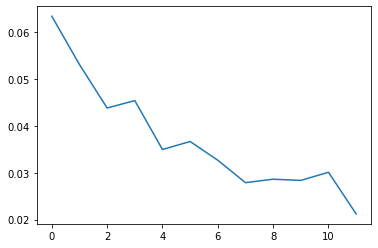

In [29]:
plt.plot(history.history['loss'])
plt.show()

In [30]:
test_input = test_df.values.astype('float32')
test_input /= 255
test_input = test_input.reshape(test_input.shape[0], 28, 28, 1)
results = best_model.predict_classes(test_input)
submissions=pd.DataFrame({"ImageId": list(range(1,len(results)+1)),
                         "Label": results})
submissions.to_csv("submission.csv", index=False, header=True)